In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller




### Load Prices 

- loads all 3 dataframes and merges into one

In [4]:
def get_prices(round: int, day: int):

    path = f"../../data/round{round}/prices_round_{round}_day_{day}.csv"
    return pd.read_csv(path, sep=";")


def get_trades(round: int, day: int):

    path = f"../../data/round{round}/trades_round_{round}_day_{day}.csv"
    return pd.read_csv(path, sep=";")

price_frames = []
trade_frames = []

for day in range(-2, 1):  

    prices = get_prices(1, day)
    trades = get_trades(1, day)
    price_frames.append(prices)
    trade_frames.append(trades)

all_prices = pd.concat(price_frames, ignore_index=True)
all_trades = pd.concat(trade_frames, ignore_index=True)
all_prices.head(5)



day  timestamp           product  bid_price_1  bid_volume_1  bid_price_2  \
0   -2          0  RAINFOREST_RESIN         9996             1       9995.0   
1   -2          0              KELP         1998            26          NaN   
2   -2          0         SQUID_INK         1998            26          NaN   
3   -2        100         SQUID_INK         1999             5       1998.0   
4   -2        100  RAINFOREST_RESIN        10000             5       9995.0   

   bid_volume_2  bid_price_3  bid_volume_3  ask_price_1  ask_volume_1  \
0          25.0          NaN           NaN        10004             1   
1           NaN          NaN           NaN         2002            26   
2           NaN          NaN           NaN         2002            26   
3          26.0          NaN           NaN         2001            20   
4          20.0          NaN           NaN        10005            20   

   ask_price_2  ask_volume_2  ask_price_3  ask_volume_3  mid_price  \
0      10005.0          25.0          NaN           NaN    10000.0   
1          NaN           NaN          NaN           NaN     2000.0   
2          NaN           NaN          NaN           NaN     2000.0   
3          NaN           NaN          NaN           NaN     2000.0   
4          NaN           NaN          NaN           NaN    10002.5   

   profit_and_loss  
0              0.0  
1              0.0  
2              0.0  
3              0.0  
4              0.0

In [7]:
all_prices_squid_ink = all_prices[all_prices["product"] == "SQUID_INK"]
all_prices_kelp = all_prices[all_prices["product"] == "KELP"]
all_prices_resin = all_prices[all_prices["product"] == "RAINFOREST_RESIN"]



In [9]:
## Price paths on 3 different days 

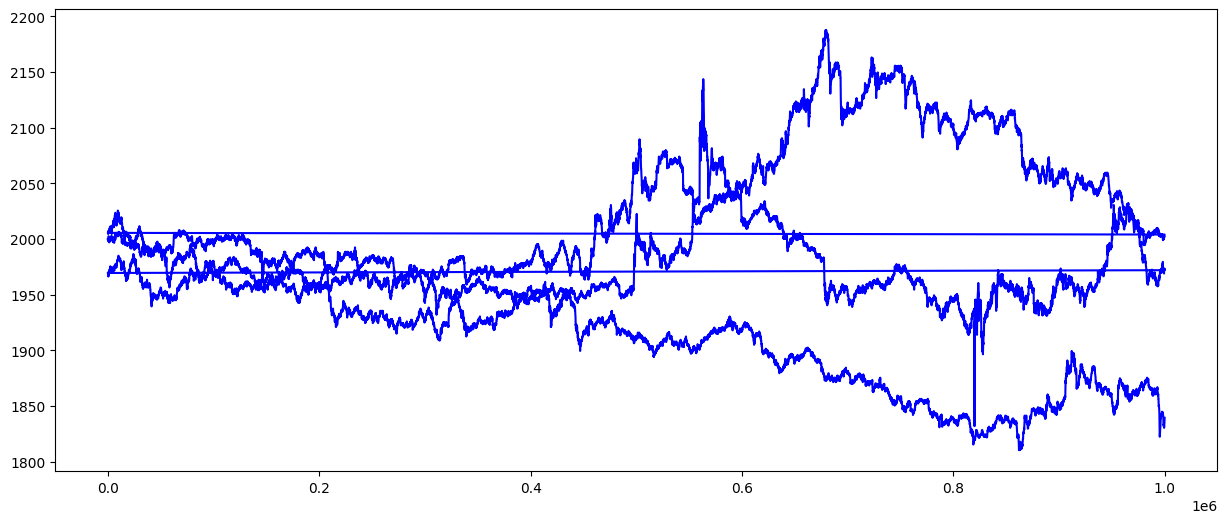

In [11]:
#Squid Ink
plt.figure(figsize=(15, 6)) 
plt.plot(all_prices_squid_ink['timestamp'], all_prices_squid_ink['mid_price'], label='Mid Price', color='blue')


In [13]:
#For first hald it remains around 2000
#For the second half then it trends 

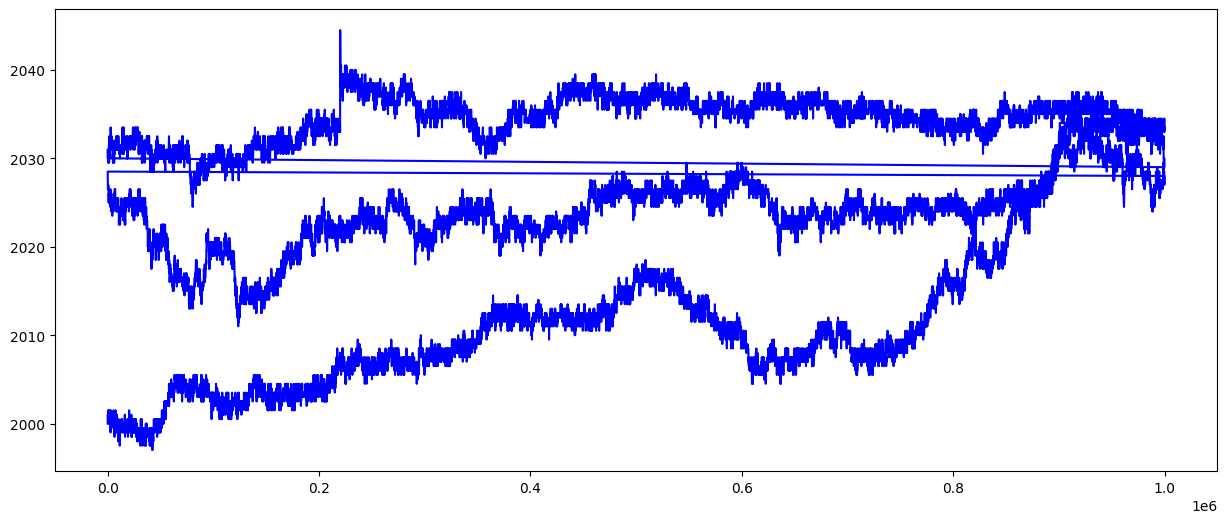

In [15]:
#Kelp
plt.figure(figsize=(15, 6)) 
plt.plot(all_prices_kelp['timestamp'], all_prices_kelp['mid_price'], label='Mid Price', color='blue')

In [17]:
## Autocorrelation

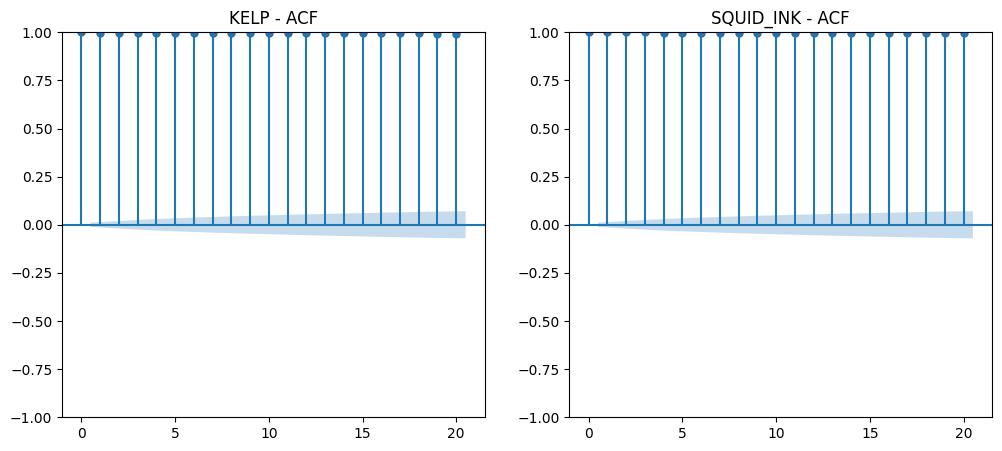

In [19]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

plot_acf(all_prices_kelp['mid_price'], lags=20, ax=axes[0])
axes[0].set_title('KELP - ACF')

plot_acf(all_prices_squid_ink['mid_price'], lags=20, ax=axes[1])
axes[1].set_title('SQUID_INK - ACF')

plt.show()


In [21]:
all_prices_kelp

day  timestamp product  bid_price_1  bid_volume_1  bid_price_2  \
1       -2          0    KELP         1998            26          NaN   
5       -2        100    KELP         2000             5       1999.0   
6       -2        200    KELP         1999             1       1998.0   
10      -2        300    KELP         1999            27          NaN   
13      -2        400    KELP         1999            20          NaN   
...    ...        ...     ...          ...           ...          ...   
89987    0     999500    KELP         2032            28          NaN   
89990    0     999600    KELP         2032            36          NaN   
89991    0     999700    KELP         2034             1       2032.0   
89995    0     999800    KELP         2032            27          NaN   
89999    0     999900    KELP         2032            23          NaN   

       bid_volume_2  bid_price_3  bid_volume_3  ask_price_1  ask_volume_1  \
1               NaN          NaN           NaN         2002            26   
5               6.0       1998.0          20.0         2002            20   
6              30.0          NaN           NaN         2002            31   
10              NaN          NaN           NaN         2002            27   
13              NaN          NaN           NaN         2002            20   
...             ...          ...           ...          ...           ...   
89987           NaN          NaN           NaN         2035            28   
89990           NaN          NaN           NaN         2035            29   
89991          26.0          NaN           NaN         2035            26   
89995           NaN          NaN           NaN         2034             1   
89999           NaN          NaN           NaN         2035            23   

       ask_price_2  ask_volume_2  ask_price_3  ask_volume_3  mid_price  \
1              NaN           NaN          NaN           NaN     2000.0   
5              NaN           NaN          NaN           NaN     2001.0   
6              NaN           NaN          NaN           NaN     2000.5   
10             NaN           NaN          NaN           NaN     2000.5   
13             NaN           NaN          NaN           NaN     2000.5   
...            ...           ...          ...           ...        ...   
89987          NaN           NaN          NaN           NaN     2033.5   
89990          NaN           NaN          NaN           NaN     2033.5   
89991          NaN           NaN          NaN           NaN     2034.5   
89995       2035.0          27.0          NaN           NaN     2033.0   
89999          NaN           NaN          NaN           NaN     2033.5   

       profit_and_loss  
1                  0.0  
5                  0.0  
6                  0.0  
10                 0.0  
13                 0.0  
...                ...  
89987              0.0  
89990              0.0  
89991              0.0  
89995              0.0  
89999              0.0  

[30000 rows x 17 columns]

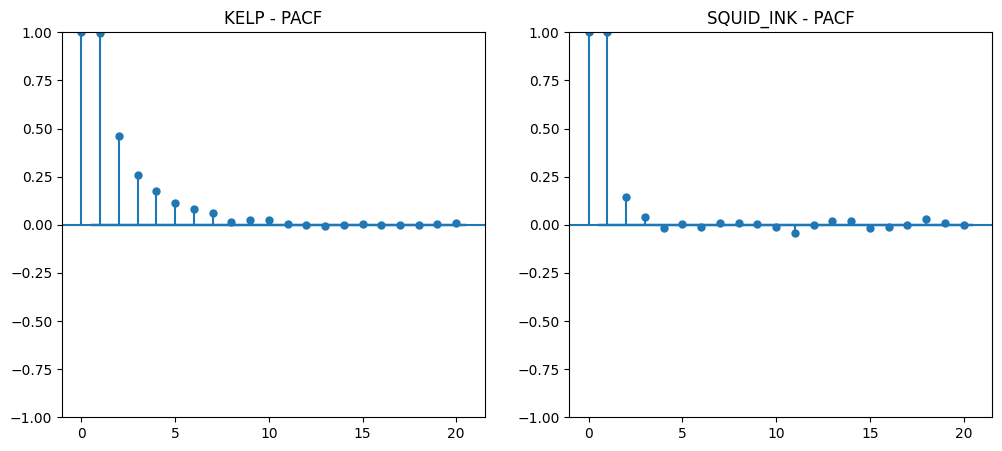

In [23]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

plot_pacf(all_prices_kelp['mid_price'], lags=20, ax=axes[0])
axes[0].set_title('KELP - PACF')

plot_pacf(all_prices_squid_ink['mid_price'], lags=20, ax=axes[1])
axes[1].set_title('SQUID_INK - PACF')

plt.show()

In [25]:
#Check for stationarity (ADF test)

In [27]:
#Kelp
result = adfuller(all_prices_kelp['mid_price'])
print("ADF Statistic:", result[0])
print("p-value:", result[1])
print("Number of lags used:", result[2])
print("Number of observations:", result[3])
print("Critical Values:")

#fail to reject H0
#Series is non-stationary


ADF Statistic: -1.9934524825044906
p-value: 0.2894513162255181
Number of lags used: 37
Number of observations: 29962
Critical Values:


In [28]:
#Squid ink
result = adfuller(all_prices_squid_ink['mid_price'])
print("ADF Statistic:", result[0])
print("p-value:", result[1])
print("Number of lags used:", result[2])
print("Number of observations:", result[3])
print("Critical Values:")


ADF Statistic: -1.383965709726067
p-value: 0.5899385633115669
Number of lags used: 41
Number of observations: 29958
Critical Values:


In [29]:
#Differencing the series and re-analysing

In [31]:
all_prices_kelp['mid_price_first_diff'] = all_prices_kelp['mid_price'].diff()

result = adfuller(all_prices_kelp['mid_price_first_diff'].dropna())
print("ADF Statistic:", result[0])
print("p-value:", result[1])


/var/folders/cb/9kkmszhd7fx9_93t2qb1_s640000gn/T/ipykernel_3060/810519478.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_prices_kelp['mid_price_first_diff'] = all_prices_kelp['mid_price'].diff()


ADF Statistic: -33.64183723069843
p-value: 0.0


In [32]:
all_prices_squid_ink['mid_price_first_diff'] = all_prices_squid_ink['mid_price'].diff()

result = adfuller(all_prices_squid_ink['mid_price_first_diff'].dropna())
print("ADF Statistic:", result[0])
print("p-value:", result[1])


/var/folders/cb/9kkmszhd7fx9_93t2qb1_s640000gn/T/ipykernel_3060/2612850432.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_prices_squid_ink['mid_price_first_diff'] = all_prices_squid_ink['mid_price'].diff()


ADF Statistic: -27.628007031320802
p-value: 0.0


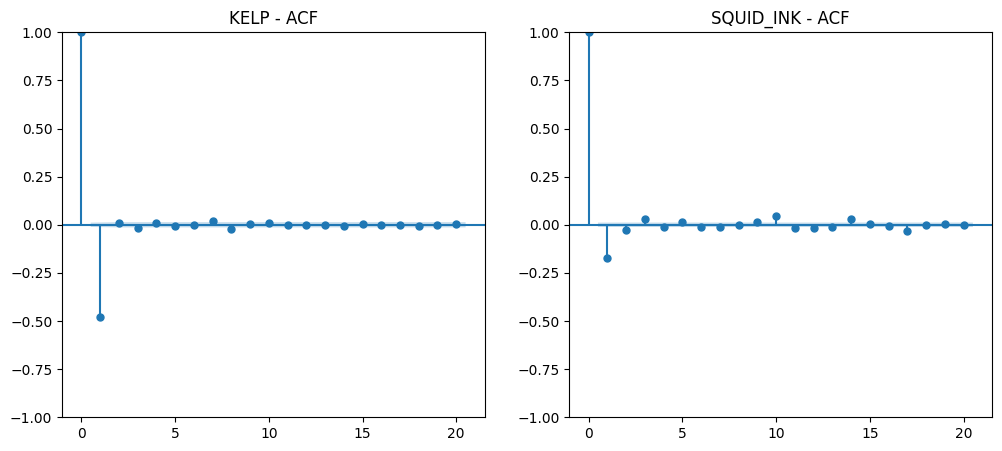

In [46]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

plot_acf(all_prices_kelp['mid_price_first_diff'].dropna(), lags=20, ax=axes[0])
axes[0].set_title('KELP - ACF')

plot_acf(all_prices_squid_ink['mid_price_first_diff'].dropna(), lags=20, ax=axes[1])
axes[1].set_title('SQUID_INK - ACF')

plt.show()

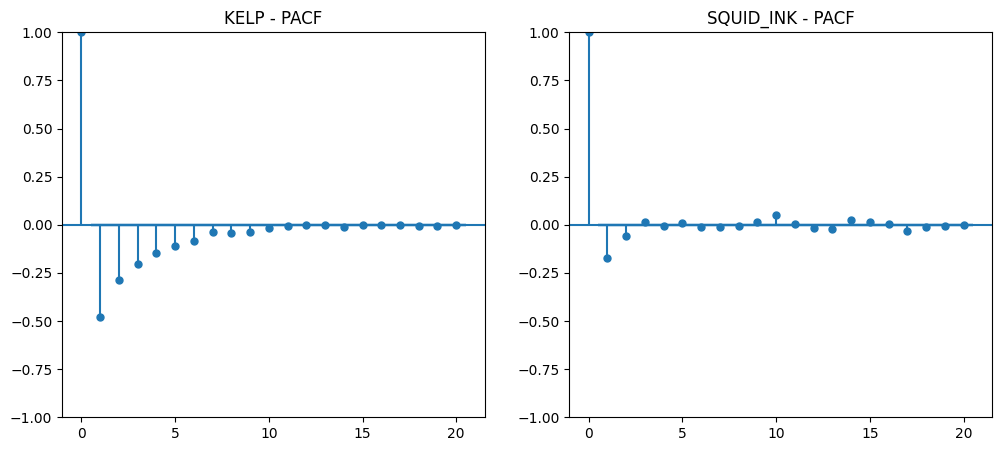

In [48]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

plot_pacf(all_prices_kelp['mid_price_first_diff'].dropna(), lags=20, ax=axes[0])
axes[0].set_title('KELP - PACF')

plot_pacf(all_prices_squid_ink['mid_price_first_diff'].dropna(), lags=20, ax=axes[1])
axes[1].set_title('SQUID_INK - PACF')


plt.show()

In [51]:
## Splitting the two regimes 

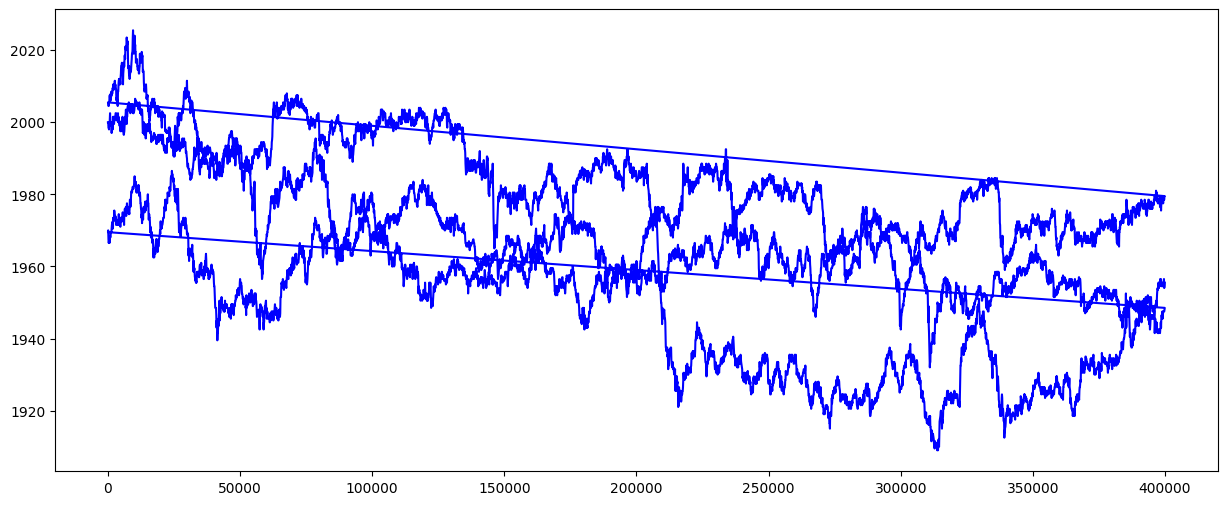

In [53]:
all_prices_squid_ink_one = all_prices[(all_prices["product"] == "SQUID_INK") & (all_prices["timestamp"] < 400000)]

plt.figure(figsize=(15, 6)) 
plt.plot(all_prices_squid_ink_one['timestamp'], all_prices_squid_ink_one['mid_price'], label='Mid Price', color='blue')


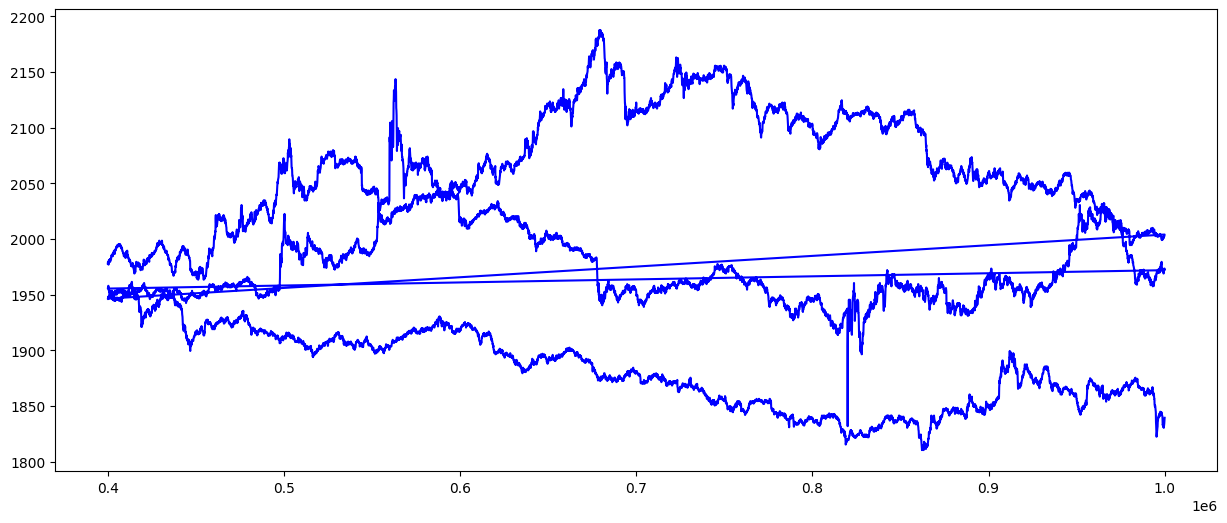

In [55]:
all_prices_squid_ink_two = all_prices[(all_prices["product"] == "SQUID_INK") & (all_prices["timestamp"] > 400000)]

plt.figure(figsize=(15, 6)) 
plt.plot(all_prices_squid_ink_two['timestamp'], all_prices_squid_ink_two['mid_price'], label='Mid Price', color='blue')

In [57]:
all_prices_squid_ink_one['mid_price_first_diff'] = all_prices_squid_ink_one['mid_price'].diff()

result = adfuller(all_prices_squid_ink_one['mid_price_first_diff'].dropna())
print("ADF Statistic:", result[0])
print("p-value:", result[1])


/var/folders/cb/9kkmszhd7fx9_93t2qb1_s640000gn/T/ipykernel_3060/3542035091.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_prices_squid_ink_one['mid_price_first_diff'] = all_prices_squid_ink_one['mid_price'].diff()


ADF Statistic: -40.61228327279849
p-value: 0.0


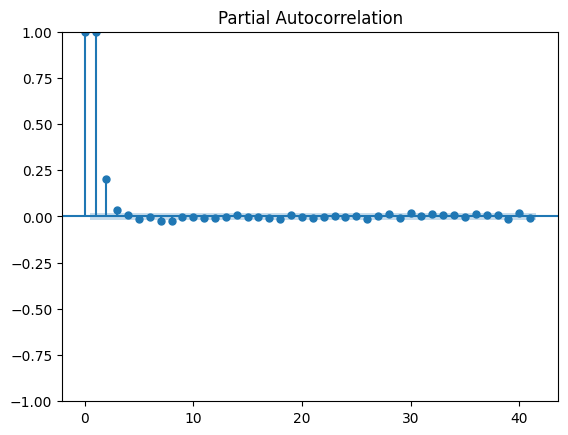

In [85]:
plot_pacf(all_prices_squid_ink_one['mid_price'])
plt.show()

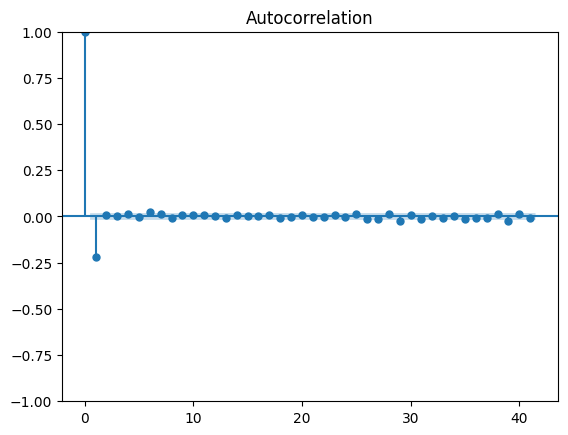

In [59]:
plot_acf(all_prices_squid_ink_one['mid_price_first_diff'].dropna())
plt.show()

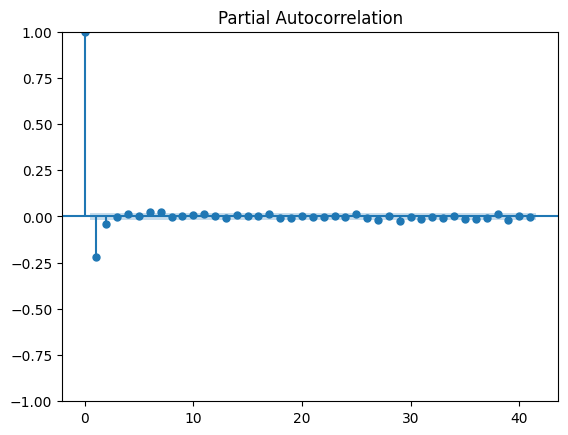

In [61]:
plot_pacf(all_prices_squid_ink_one['mid_price_first_diff'].dropna())
plt.show()

In [63]:
all_prices_squid_ink_two['mid_price_first_diff'] = all_prices_squid_ink_two['mid_price'].diff()

result = adfuller(all_prices_squid_ink_two['mid_price_first_diff'].dropna())
print("ADF Statistic:", result[0])
print("p-value:", result[1])


/var/folders/cb/9kkmszhd7fx9_93t2qb1_s640000gn/T/ipykernel_3060/2317180362.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_prices_squid_ink_two['mid_price_first_diff'] = all_prices_squid_ink_two['mid_price'].diff()


ADF Statistic: -23.10805940700473
p-value: 0.0


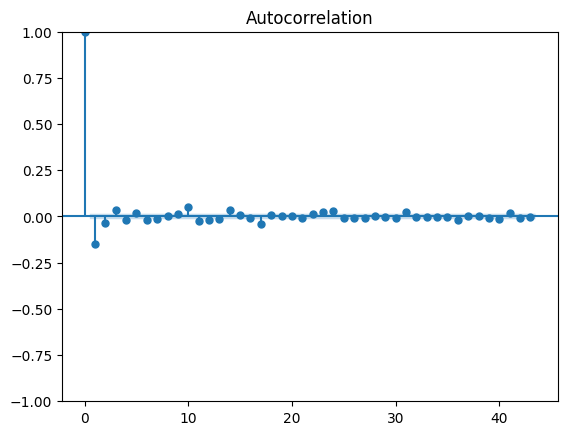

In [64]:
plot_acf(all_prices_squid_ink_two['mid_price_first_diff'].dropna())
plt.show()

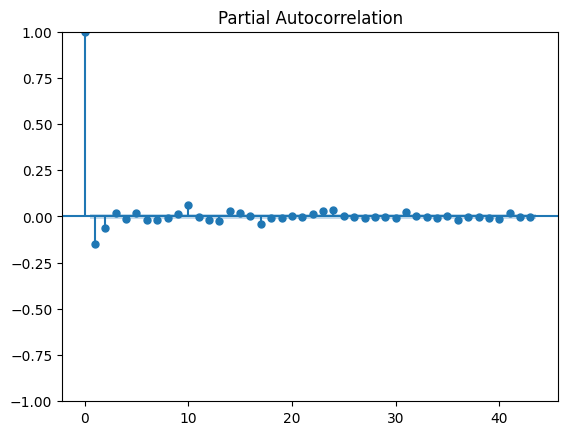

In [67]:
plot_pacf(all_prices_squid_ink_two['mid_price_first_diff'].dropna())
plt.show()